<a href="https://colab.research.google.com/github/nikhi1010/Heart-Attack-Prediction/blob/main/thyroid_detection_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from  xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn.regression import regplot
from matplotlib import pyplot as plt

In [ ]:
#importing and read 'All' type dataset
allHyperTest = pd.read_csv("/content/allhyperTrainEDIT.CSV")
allHyperTrain = pd.read_csv("/content/allhyperTrainEDIT.CSV")
allHypoTest = pd.read_csv("/content/allhypoTEST.csv")
allHypoTrain = pd.read_csv("/content/allhypoDATA.CSV")

display(allHypoTest.head(10))
display(allHypoTrain.dtypes)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Target,ID
0,35,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,f,?,other,negative,219
1,63,M,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,3.5,t,2.5,t,108,t,0.96,t,113,f,?,SVI,negative,2059
2,25,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,4.6,t,2.4,t,61,t,0.82,t,75,f,?,SVHD,negative,399
3,53,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.25,t,2.1,t,145,t,1.03,t,141,f,?,other,negative,1911
4,92,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,1.3,t,120,t,0.84,t,143,f,?,SVI,negative,487
5,67,M,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.81,f,?,t,84,t,0.83,t,101,f,?,other,negative,1234
6,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.2,t,2.6,t,117,t,1.31,t,90,f,?,other,negative,1113
7,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,27,t,1.8,t,65,t,0.99,t,66,f,?,SVI,compensated_hypothyroid,1344
8,48,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.8,f,?,t,112,t,0.92,t,121,f,?,other,negative,2758
9,27,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,2.6,t,2.2,t,94,t,0.89,t,106,f,?,SVI,negative,3230


age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

In [ ]:
# delete all ID cols
del allHyperTest["ID"]
del allHyperTrain["ID"]
del allHypoTest["ID"]
del allHypoTrain["ID"]

In [ ]:
# destinguished wheather the target is hypothyroid or hyperthyroid
def notCorrect_TargetFilter(df,correct_Target,target):
    df = df[df.Target.isin(correct_Target)]
    df.replace(correct_Target,target,inplace = True)
    return df
    
allHyperTest = notCorrect_TargetFilter(allHyperTest,["hyperthyroid","T3_toxic","goitre","secondary_toxic"],"hyperthyroid")
allHyperTrain = notCorrect_TargetFilter(allHyperTrain,["hyperthyroid","T3_toxic","goitre","secondary_toxic"],"hyperthyroid")
allHypoTest = notCorrect_TargetFilter(allHypoTest,["hypothyroid", "primary_hypothyroid", "compensated_hypothyroid", "secondary_hypothyroid"],"hypothyroid")
allHypoTrain = notCorrect_TargetFilter(allHypoTrain,["hypothyroid", "primary_hypothyroid", "compensated_hypothyroid", "secondary_hypothyroid"],"hypothyroid")

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
# combining all 'All' type data
allDataset = pd.concat([allHyperTest,allHyperTrain,allHypoTest,allHypoTrain], ignore_index = True)
display(allDataset.shape)

(445, 30)

In [ ]:
# importing and read thyroid0387 data
thyroid0387 = pd.read_csv("/content/thyroid0387EDIT.CSV")
display(thyroid0387.head(10))
display(thyroid0387.dtypes)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Target,ID
0,29,F,f,f,f,f,f,f,f,t,f,f,f,f,f,f,t,0.3,f,?,f,?,f,?,f,?,f,?,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.6,t,1.9,t,128,f,?,f,?,f,?,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,t,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,11,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,36,other,S,840803047
5,60,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,26,other,-,840803048
6,77,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,f,?,f,?,f,?,f,?,f,?,t,21,other,-,840803068
7,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,0.7,t,2.6,t,116,f,?,f,?,f,?,SVI,-,840807019
8,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.2,t,1.8,t,76,f,?,f,?,f,?,other,-,840808060
9,28,F,f,f,f,f,f,f,f,f,f,f,f,f,f,f,t,1.9,t,1.7,t,83,f,?,f,?,f,?,other,-,840808073


age                           int64
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

In [ ]:
#delete ID col
del thyroid0387["ID"]

In [ ]:
#converting object into int
thyroid0387['sex'] = thyroid0387['sex'].map({'F': 1, 'M': 0})

thyroid0387.replace(['A','B','C','D'],"hyperthyroid",inplace = True)
thyroid0387.replace(['E','F','G','H'],"hypothyroid",inplace = True)

for value in set(thyroid0387['Target']):
    if(value != 'hypothyroid' and value != 'hyperthyroid'):
        thyroid0387.replace(value,'negative',inplace=True)

In [ ]:
#import and read hypothyroid data
hypothyroid = pd.read_csv("/content/hypothyroid.csv")
display(hypothyroid.shape)
display(hypothyroid.head(10))
display(hypothyroid.dtypes)

(3163, 26)

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?
5,hypothyroid,85,F,f,f,f,f,t,f,f,f,f,f,f,y,138,y,1.1,y,27,y,1.19,y,23,n,?
6,hypothyroid,64,F,f,f,f,t,f,f,f,f,f,f,f,y,7.7,y,1.3,y,54,y,0.86,y,63,n,?
7,hypothyroid,72,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,1.9,y,34,y,1.05,y,32,n,?
8,hypothyroid,20,F,f,f,f,f,t,f,f,f,f,f,f,y,92,n,?,y,39,y,1.21,y,32,n,?
9,hypothyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,48,n,?,y,7.6,y,1.02,y,7.5,n,?


Unnamed: 0                   object
Age                          object
Sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
#renaming parameters 
hypothyroid = hypothyroid.rename(columns={hypothyroid.columns[0]:"Target",hypothyroid.columns[1]:"age",hypothyroid.columns[2]:"sex" })
hypothyroid = hypothyroid[hypothyroid.Target.isin(['hypothyroid'])]

In [ ]:
# import and read sick_euthyroid
sick_euthyroid = pd.read_csv("/content/sick-euthyroid.CSV")
display(sick_euthyroid.shape)
display(sick_euthyroid.head(10))
display(sick_euthyroid.dtypes)

(3163, 26)

,Target,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,sick-euthyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,n,?,y,1,y,83,y,0.95,y,87,n,?
1,sick-euthyroid,45,F,f,f,f,f,f,f,f,f,f,f,f,y,1.90,y,1,y,82,y,0.73,y,112,n,?
2,sick-euthyroid,64,F,f,f,f,f,f,f,f,t,f,f,f,y,0.09,y,1,y,101,y,0.82,y,123,n,?
3,sick-euthyroid,56,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.80,y,76,y,0.77,y,99,n,?
4,sick-euthyroid,78,F,t,f,f,f,t,f,f,f,f,f,f,y,2.60,y,0.30,y,87,y,0.95,y,91,n,?
5,sick-euthyroid,80,M,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,0.80,y,105,y,0.88,y,120,n,?
6,sick-euthyroid,74,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.70,y,98,y,0.81,y,121,n,?
7,sick-euthyroid,?,F,f,f,f,f,f,f,f,f,f,f,f,y,1.40,y,1.10,y,121,y,1.11,y,109,n,?
8,sick-euthyroid,42,F,f,f,f,f,f,f,f,f,f,f,f,y,2.30,y,1.10,y,93,y,0.73,y,127,n,?
9,sick-euthyroid,89,M,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,0.80,y,111,y,0.68,y,165,n,?


Target                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [ ]:
# fill null values
sick_euthyroid = sick_euthyroid[sick_euthyroid.Target.isin(['negative'])]
display(sick_euthyroid.shape)

(2870, 26)

In [ ]:
#importing and read ann test & train data
ann_train = pd.read_csv("/content/ann-train.CSV")
ann_test = pd.read_csv("/content/ann-test.CSV")
display(ann_test.head(10))
display(ann_test.dtypes)

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,Target
0,0.29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00610,0.028,0.111,0.131,0.08500,2
1,0.32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00130,0.019,0.084,0.078,0.10700,3
2,0.35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.031,0.239,0.100,0.23900,3
3,0.21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00100,0.018,0.087,0.088,0.09900,3
4,0.22,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.00040,0.022,0.134,0.135,0.09900,3
5,0.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00160,0.020,0.123,0.113,0.10900,3
6,0.39,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.00160,0.036,0.133,0.144,0.09300,3
7,0.77,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00081,0.020,0.080,0.096,0.08316,3
8,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00025,0.014,0.113,0.096,0.11746,3
9,0.23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00260,0.011,0.104,0.104,0.09900,3


age                          float64
sex                            int64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Target                         int64
dtype: object

In [ ]:
target1 = pd.Series(ann_test[ann_test.columns[-1]].values)
display(target1.value_counts())
target2 = pd.Series(ann_train[ann_train.columns[-1]].values)
display(target2.value_counts())

3    3178
2     177
1      73
dtype: int64

3    3488
2     191
1      93
dtype: int64

In [ ]:
print("Sex thyroid0387 1=F,0=M:")
sex_series1 = pd.Series(thyroid0387[thyroid0387.columns[1]].values)
display(sex_series1.value_counts())
print("Sick-euthyroid:")
sex_series2 = pd.Series(sick_euthyroid[sick_euthyroid.columns[2]].values)
display(sex_series2.value_counts())

Sex thyroid0387 1=F,0=M:


1.0    6073
0.0    2792
dtype: int64

Sick-euthyroid:


F    2003
M     800
?      67
dtype: int64

In [ ]:
sex1 = pd.Series(ann_test[ann_test.columns[1]].values)
display(sex1.value_counts())
sex2 = pd.Series(ann_train[ann_train.columns[1]].values)
display(sex2.value_counts())

0    2380
1    1048
dtype: int64

0    2629
1    1143
dtype: int64

In [ ]:
ann = pd.concat([ann_train,ann_test], ignore_index = True)
ann['sex'] = ann['sex'].map({0:'F',1:'M'})
ann['Target'] = ann['Target'].map({3:'negative',2:'hypothyroid',1:'hyperthyroid'})

continuos_attributes = ['age','TSH','T3','TT4','T4U','FTI']
for attribute in continuos_attributes:
    ann[attribute] = ann[attribute] * 100

def fillNewAttributes(row,attribute):
    if row[attribute] > 0:
        return 'y'
    else:
        return 'n'

# adding new attributes in ann data
ann['TSH_measured'] = ann.apply(lambda row: fillNewAttributes(row,'TSH'), axis=1)
ann['T3_measured'] = ann.apply(lambda row: fillNewAttributes(row,'T3'), axis=1)
ann['TT4_measured'] = ann.apply(lambda row: fillNewAttributes(row,'TT4'), axis=1)
ann['T4U_measured'] = ann.apply(lambda row: fillNewAttributes(row,'T4U'), axis=1)
ann['FTI_measured'] = ann.apply(lambda row: fillNewAttributes(row,'FTI'), axis=1)
display(ann.dtypes)

age                          float64
sex                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment                 int64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                  int64
psych                          int64
TSH                          float64
T3                           float64
TT4                          float64
T4U                          float64
FTI                          float64
Target                        object
TSH_measured                  object
T3_measured                   object
TT4_measured                  object
T4U_measured                  object
FTI_measured                  object
d

In [ ]:
#combine all dataset 
data = pd.concat([allDataset,thyroid0387,hypothyroid,sick_euthyroid,ann], ignore_index = True)
display(data.shape)
display(data.dtypes)

(19838, 30)

age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
sick                         object
pregnant                     object
thyroid_surgery              object
I131_treatment               object
query_hypothyroid            object
query_hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                         

In [ ]:
#adding new parameters 
data.loc[data.index.to_series().sample(frac=0.4).index, 'Hairloss'] = 1
data['Hairloss'].fillna(0,inplace=True)
data.loc[data.index.to_series().sample(frac=0.4).index, 'Constipation'] = 1
data['Constipation'].fillna(0,inplace=True)
data.loc[data.index.to_series().sample(frac=0.4).index, 'Nervousness'] = 1
data['Nervousness'].fillna(0,inplace=True)
data.loc[data.index.to_series().sample(frac=0.4).index, 'Skin'] = 1
data['Skin'].fillna(0,inplace=True)
data.loc[data.index.to_series().sample(frac=0.4).index, 'Feeling Tired'] = 1
data['Feeling Tired'].fillna(0,inplace=True)

In [ ]:
#replacing ? into NaN values 
data=data.replace({"?":np.NAN})
data.isna().sum()

age                            409
sex                            397
on_thyroxine                     0
query_on_thyroxine               0
on_antithyroid_medication        0
sick                             0
pregnant                         0
thyroid_surgery                  0
I131_treatment                3021
query_hypothyroid                0
query_hyperthyroid               0
lithium                          0
goitre                           0
tumor                            0
hypopituitary                 3021
psych                         3021
TSH_measured                     0
TSH                           1324
T3_measured                      0
T3                            3377
TT4_measured                     0
TT4                            696
T4U_measured                     0
T4U                           1084
FTI_measured                     0
FTI                           1076
TBG_measured                  7200
TBG                          19226
referral_source     

In [ ]:
#delete unnecessary cols
del data['TBG']
del data['referral_source']
del data['TBG_measured']
del data['sex']

In [ ]:
#finding all null values
data.dropna(axis = 0, thresh = 20, inplace = True)
data.isna().sum()

age                           409
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment               3021
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                3021
psych                        3021
TSH_measured                    0
TSH                          1324
T3_measured                     0
T3                           3377
TT4_measured                    0
TT4                           696
T4U_measured                    0
T4U                          1084
FTI_measured                    0
FTI                          1076
Target                          0
Hairloss                        0
Constipation                    0
Nervousness                     0
Skin          

In [ ]:
# replacing str into int
data = data.replace({"t":1,"f":0, "y":1, "n":0, "hypothyroid":1, "negative":0,"hyperthyroid":2, "F":1, "M":0})
display(data.dtypes)

age                           object
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment               float64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                float64
psych                        float64
TSH_measured                   int64
TSH                           object
T3_measured                    int64
T3                            object
TT4_measured                   int64
TT4                           object
T4U_measured                   int64
T4U                           object
FTI_measured                   int64
FTI                           object
Target                         int64
Hairloss                     float64
C

In [ ]:
# converting obj into float
cols = data.columns[data.dtypes.eq('object')]
data[cols] = data[cols].apply(pd.to_numeric, errors='coerce')
display(data.dtypes)

age                          float64
on_thyroxine                   int64
query_on_thyroxine             int64
on_antithyroid_medication      int64
sick                           int64
pregnant                       int64
thyroid_surgery                int64
I131_treatment               float64
query_hypothyroid              int64
query_hyperthyroid             int64
lithium                        int64
goitre                         int64
tumor                          int64
hypopituitary                float64
psych                        float64
TSH_measured                   int64
TSH                          float64
T3_measured                    int64
T3                           float64
TT4_measured                   int64
TT4                          float64
T4U_measured                   int64
T4U                          float64
FTI_measured                   int64
FTI                          float64
Target                         int64
Hairloss                     float64
C

In [ ]:
corr_values = abs(data[data.columns[0:]].corr()['Target'][:])
corr_values = corr_values.drop('Target')
corr_values = corr_values[corr_values > 0.04]
display(corr_values)

on_thyroxine          0.083627
query_hypothyroid     0.046989
query_hyperthyroid    0.079984
tumor                 0.045738
psych                 0.051554
TSH                   0.241937
T3                    0.061003
TT4_measured          0.048676
TT4                   0.058766
T4U                   0.044543
FTI                   0.069456
Name: Target, dtype: float64

In [ ]:
# classifying train and test
def holdout(dataframe):
  x = dataframe[corr_values.index]
  y = dataframe['Target']
  X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42) 
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = holdout(data)

In [ ]:
#adding xgb classifier to boost classification 
classifiers = {
    "XGBClassifier" : XGBClassifier(learning_rate=0.01)}

In [ ]:
# calculating accuracy ,precision,recall,F1score of classifier 
def classification(classifiers, X_train, X_test, y_train, y_test):
  res = pd.DataFrame(columns=["Classifier", 
                                "Accuracy", 
                                "Precision", 
                                "Recall", 
                                "F1Score"])
  for name, clf in classifiers.items():
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            pr, rc, fs, sup = metrics.precision_recall_fscore_support(y_test, y_pred, average='macro')
            res = res.append({"Classifier": name,"Accuracy": round(metrics.accuracy_score(y_test, y_pred), 4),
                              "Precision": round(pr, 4), "Recall":round(rc, 4), "F1Score":round(fs, 4)}, ignore_index=True)
            print("Confusion matrix for: ", name)
            display(confusion_matrix(y_test, y_pred))
  res.set_index("F1Score", inplace=True)
  res.sort_values(by="F1Score", ascending=False, inplace=True)   
  return res

display(classification(classifiers, X_train, X_test, y_train, y_test))

Confusion matrix for:  XGBClassifier


array([[5301,   45,   12],
       [ 172,  265,    0],
       [  69,    2,   86]])

,Classifier,Accuracy,Precision,Recall
F1Score,,,,
0.7849,XGBClassifier,0.9496,0.8945,0.7145


In [ ]:
#fill all null values 
data1 = data.interpolate(method = 'spline', order = 3)
display(data1.isna().sum())

age                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
Target                       0
Hairloss                     0
Constipation                 0
Nervousness                  0
Skin                         0
Feeling Tired                0
dtype: int64

In [ ]:
data1

,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,Target,Hairloss,Constipation,Nervousness,Skin,Feeling Tired
0,63.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.030,1,5.50,1,199.0,1,1.05,1,190.00,2,1.0,0.0,0.0,1.0,0.0
1,87.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.150,1,1.70,1,162.0,1,0.87,1,186.00,2,1.0,0.0,0.0,1.0,0.0
2,70.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.005,1,2.60,1,160.0,1,0.88,1,180.00,2,1.0,0.0,0.0,1.0,0.0
3,58.0,1,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0.0,1,0.010,1,3.30,1,129.0,1,1.23,1,105.00,2,0.0,0.0,1.0,0.0,0.0
4,65.0,0,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0.0,1,0.150,1,3.50,1,217.0,1,0.98,1,221.00,2,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19833,59.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,1.0,1,0.250,1,2.08,1,7.9,1,9.90,1,8.00,0,1.0,0.0,0.0,1.0,0.0
19834,51.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,10.600,1,0.60,1,0.5,1,8.90,1,0.55,2,0.0,1.0,0.0,1.0,1.0
19835,51.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,1.0,1,0.076,1,2.01,1,9.0,1,6.70,1,13.40,0,0.0,0.0,1.0,0.0,1.0
19836,35.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.280,1,2.01,1,9.0,1,8.90,1,10.10,0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#converting table into csv
data1.to_csv('Table.csv')

In [ ]:
# import and read table data 
table=pd.read_csv('Table.csv')
table

,Unnamed: 0,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,Target,Hairloss,Constipation,Nervousness,Skin,Feeling Tired
0,0,63.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.030,1,5.50,1,199.0,1,1.05,1,190.00,2,1.0,0.0,0.0,1.0,0.0
1,1,87.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.150,1,1.70,1,162.0,1,0.87,1,186.00,2,1.0,0.0,0.0,1.0,0.0
2,2,70.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.005,1,2.60,1,160.0,1,0.88,1,180.00,2,1.0,0.0,0.0,1.0,0.0
3,3,58.0,1,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0.0,1,0.010,1,3.30,1,129.0,1,1.23,1,105.00,2,0.0,0.0,1.0,0.0,0.0
4,4,65.0,0,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0.0,1,0.150,1,3.50,1,217.0,1,0.98,1,221.00,2,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19833,19833,59.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,1.0,1,0.250,1,2.08,1,7.9,1,9.90,1,8.00,0,1.0,0.0,0.0,1.0,0.0
19834,19834,51.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,10.600,1,0.60,1,0.5,1,8.90,1,0.55,2,0.0,1.0,0.0,1.0,1.0
19835,19835,51.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,1.0,1,0.076,1,2.01,1,9.0,1,6.70,1,13.40,0,0.0,0.0,1.0,0.0,1.0
19836,19836,35.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.280,1,2.01,1,9.0,1,8.90,1,10.10,0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# importing all required classifiers
from sklearn.linear_model import SGDClassifier
classifiers1 = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors" : KNeighborsClassifier(4),
    "Decision Tree" : DecisionTreeClassifier(),
    "Naive Bayes" : GaussianNB(),
    "SVM" : SVC(),
    "Gradient Classifier": GradientBoostingClassifier(),
    "SGDClassifier":SGDClassifier()
}
classifiers1

{'Decision Tree': DecisionTreeClassifier(),
 'Gradient Classifier': GradientBoostingClassifier(),
 'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=4),
 'Naive Bayes': GaussianNB(),
 'Random Forest': RandomForestClassifier(),
 'SGDClassifier': SGDClassifier(),
 'SVM': SVC()}

In [ ]:
# calculate confusion matrix and classifiers 
corr_values = abs(data1[data1.columns[0:]].corr()['Target'][:])
corr_values = corr_values.drop('Target')
corr_values = corr_values[corr_values > 0.04]

X_train1, X_test1, y_train1, y_test1 = holdout(data1)
display(classification(classifiers1,X_train1, X_test1, y_train1, y_test1))

NameError: ignored

In [ ]:
# importing classifiers table as csv
book11 = pd.read_csv("/content/Book11.csv")
book11


,classifiers,F1Score,Precision,Recall,t
0,R F,0.5814,0.6568,0.5605,0.9365
1,D T,0.5789,0.6425,0.5609,0.9363
2,KN N,0.5153,0.6380,0.5013,0.9215
3,Naïve,0.4367,0.4900,0.4167,0.9057
4,G C,0.2157,0.4784,0.4572,0.2251


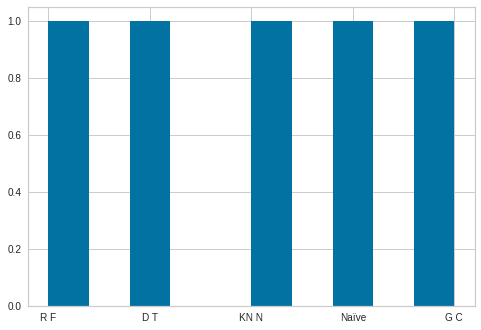

In [ ]:
from matplotlib import pyplot as plt
plt.hist(book11['classifiers'],
         bins=10)
plt.show()

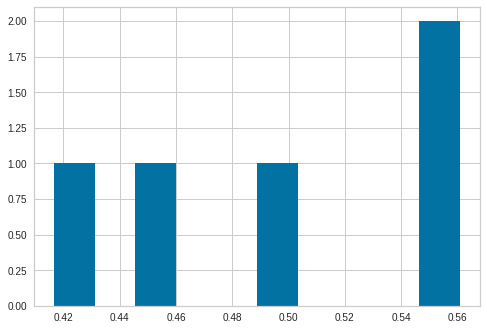

In [ ]:
from matplotlib import pyplot as plt
plt.hist(book11['Recall'],
         bins=10)
plt.show()

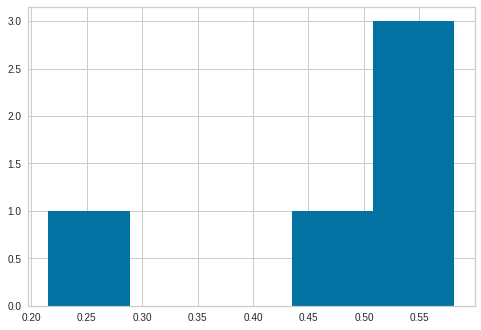

In [ ]:
from matplotlib import pyplot as plt
plt.hist(book11['F1Score'],
         bins=5)
plt.show()

In [ ]:
#sns.lmplot(x=classifiers, y=Recall,data=book11,
         #  fit_reg=False,hue=F1Score,
          # legend=True,palette="Set1")

In [ ]:
book11 = pd.read_csv("/content/Book11.csv")
book11

,classifiers,F1Score,Precision,Recall,t
0,R F,0.5814,0.6568,0.5605,0.9365
1,D T,0.5789,0.6425,0.5609,0.9363
2,KN N,0.5153,0.6380,0.5013,0.9215
3,Naïve,0.4367,0.4900,0.4167,0.9057
4,G C,0.2157,0.4784,0.4572,0.2251


In [ ]:
table

,Unnamed: 0,age,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,query_hyperthyroid,lithium,goitre,tumor,hypopituitary,psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,Target,Hairloss,Constipation,Nervousness,Skin,Feeling Tired
0,0,63.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.030,1,5.50,1,199.0,1,1.05,1,190.00,2,1.0,0.0,0.0,1.0,0.0
1,1,87.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.150,1,1.70,1,162.0,1,0.87,1,186.00,2,1.0,0.0,0.0,1.0,0.0
2,2,70.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.005,1,2.60,1,160.0,1,0.88,1,180.00,2,1.0,0.0,0.0,1.0,0.0
3,3,58.0,1,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0.0,1,0.010,1,3.30,1,129.0,1,1.23,1,105.00,2,0.0,0.0,1.0,0.0,0.0
4,4,65.0,0,0,0,0,0,0,0.0,0,1,0,0,0,0.0,0.0,1,0.150,1,3.50,1,217.0,1,0.98,1,221.00,2,1.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19833,19833,59.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,1.0,1,0.250,1,2.08,1,7.9,1,9.90,1,8.00,0,1.0,0.0,0.0,1.0,0.0
19834,19834,51.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,10.600,1,0.60,1,0.5,1,8.90,1,0.55,2,0.0,1.0,0.0,1.0,1.0
19835,19835,51.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,1.0,1,0.076,1,2.01,1,9.0,1,6.70,1,13.40,0,0.0,0.0,1.0,0.0,1.0
19836,19836,35.0,0,0,0,0,0,0,0.0,0,0,0,0,0,0.0,0.0,1,0.280,1,2.01,1,9.0,1,8.90,1,10.10,0,0.0,0.0,0.0,1.0,0.0


In [ ]:
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 12)
#ax = sns.heatmap(book11)

In [ ]:
#ax = sns.heatmap(book11, cmap="YlGnBu")


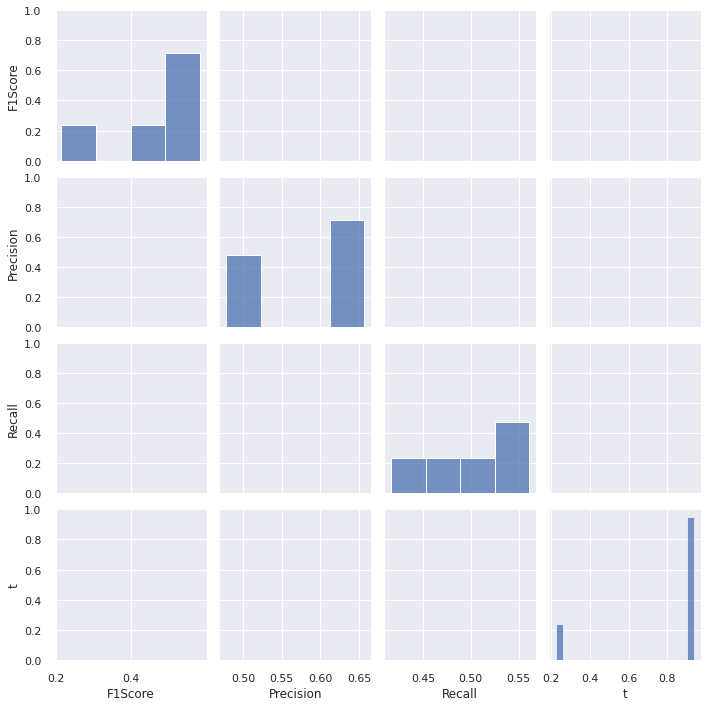

In [ ]:
sns.pairplot(book11,kind="Heat") #"""hue="Precision"""")
plt.show()

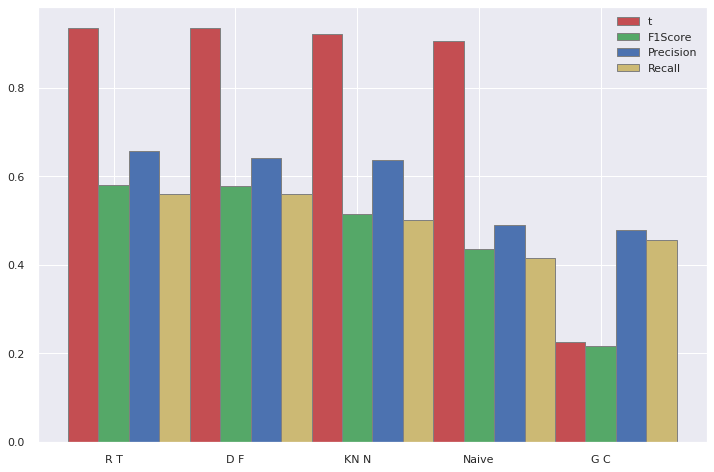

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
t=book11['t']
F1Score=book11['F1Score']
#y2=book11['Accuracy']
Precision=book11['Precision']
Recall=book11['Recall']

# Set position of bar on X axis
br1 = np.arange(len(Recall))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4=[x+ barWidth for x in br3]
br5=[x+ barWidth for x in br4]


# Make the plot
plt.bar(br1, t, color ='r', width = barWidth,
	edgecolor ='grey', label ='t')
plt.bar(br2, F1Score, color ='g', width = barWidth,
		edgecolor ='grey', label ='F1Score')
plt.bar(br3, Precision, color ='b', width = barWidth,
		edgecolor ='grey', label ='Precision')
plt.bar(br4, Recall, color ='y', width = barWidth,
		edgecolor ='grey', label ='Recall')


# Adding Xticks
plt.xticks([r + barWidth for r in range(len(F1Score))],
		['R T', 'D F', 'KN N', 'Naive', 'G C'])

plt.legend()
plt.show()

In [ ]:
for key in book11['t'].keys():
    print(key)

0
1
2
3
4


([], <a list of 0 Text major ticklabel objects>)

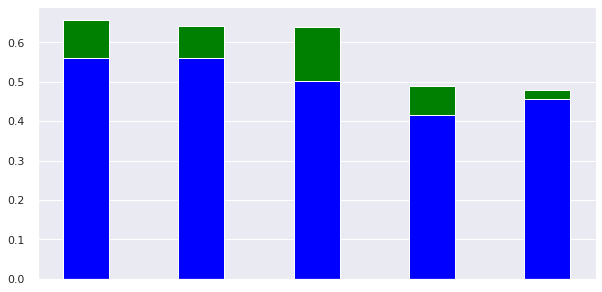

In [ ]:
x=book11['classifiers']
y1=book11['Recall']
y2=book11['Precision']
y3=book11['Recall']
fig = plt.figure(figsize = (10, 5))
plt.bar(x,y1, color ='maroon',
        width = 0.4)
plt.bar(x,y2, color ='green',
        width = 0.4)
plt.bar(x,y3, color ='blue',
        width = 0.4)
plt.xticks([])


In [ ]:
#sns.countplot(x="Recall",
           #   data=book11)

In [ ]:
#sns.countplot(x="F1Score",
   #           data=book11)

In [ ]:
#FEATURE SELECTION METHOD
#INFORMATION GAIN- Calculates reduction in entropy from transformation of dataset
# calculate the information gain
from math import log2
 
# calculate the entropy for the split in the dataset
def entropy(class0, class1):
	return -(class0 * log2(class0) + class1 * log2(class1))
 
# split of the main dataset
class0 =  9000 / 19838
class1 =  10838 / 19838
# calculate entropy before the change
s_entropy = entropy(class0, class1)
print('Dataset Entropy: %.3f bits' % s_entropy)
 
# split 1 (split via value1)
s1_class0 = 6000 / 7000
s1_class1 = 1000 / 7000
# calculate the entropy of the first group
s1_entropy = entropy(s1_class0, s1_class1)
print('Group1 Entropy: %.3f bits' % s1_entropy)
 
# split 2  (split via value2)
s2_class0 = 6000 / 12000
s2_class1 = 6000 / 12000
# calculate the entropy of the second group
s2_entropy = entropy(s2_class0, s2_class1)
print('Group2 Entropy: %.3f bits' % s2_entropy)
 
# calculate the information gain
gain = s_entropy - (7000/19838 * s1_entropy + 12000/19838 * s2_entropy)
print('Information Gain: %.3f bits' % gain)
# print("Information Gain: %.3f bits" % gain)*100= percent


Dataset Entropy: 0.994 bits
Group1 Entropy: 0.592 bits
Group2 Entropy: 1.000 bits
Information Gain: 0.180 bits


In [ ]:
#Gain Ratio- = gain/Intic-info --
def calc_information_gain(book11, classifiers, Recall)


SyntaxError: ignored

In [ ]:
!pip install sklearn_relief

In [ ]:
# Feature Selection
import sklearn_relief as sr
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
r = sr.RReliefF(n_features = 20)
r.fit(X_train,y_train)

RReliefF()

In [ ]:
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_wine
np.set_printoptions(precision=4)

In [ ]:
wine_info = load_wine()
X = pd.DataFrame(wine_info.data, columns=wine_info.feature_names)
y = pd.Categorical.from_codes(wine_info.target, wine_info.target_names)
wine_info.target_names 
array(['class_0', 'class_1', 'class_2'], dtype='<U7')
df = X.join(pd.Series(y, name='class'))
feature_means1 = pd.DataFrame(columns=wine_info.target_names)
for c, rows in df.groupby('class'):
feature_means1[c] = rows.mean()
feature_means1
withinclass_scatter_matrix = np.zeros((13,13))
for c, rows in df.groupby('class'):
rows = rows.drop(['class'], axis=1)

s = np.zeros((13,13))
for index, row in rows.iterrows():
x, mc = row.values.reshape(13,1),
feature_means1[c].values.reshape(13,1)

s += (x - mc).dot((x - mc).T)

withinclass_scatter_matrix += s

IndentationError: ignored

In [ ]:
#LDAC -LINEAR DISCRIMINANT ANALYSIS - DIMENTIONAL REDUCTION
#Correlation Pascal FSM - 
#Recursive FSM 

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("Table.csv")
X =data.iloc[:,0:9]#independent columns
y = data.iloc[:,-1] #target column


In [ ]:
data.head()

In [ ]:
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [ ]:
#PEARSON COORELATION METHOD
# https://www.geeksforgeeks.org/python-pearson-correlation-test-between-two-variables/
# Import those libraries
import pandas as pd
from scipy.stats import pearsonr
 
# Import your data into Python
df = pd.read_csv("Book11.csv")
 
# Convert dataframe into series
list1 = df['F1Score']
list2 = df['Recall']
 
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

In [ ]:
# python implementation of Grey wolf optimization (GWO)
# minimizing rastrigin and sphere function
 
 
import random
import math    # cos() for Rastrigin
import copy    # array-copying convenience
import sys     # max float
 
 
#-------fitness functions---------
 
# rastrigin function
def fitness_rastrigin(position):
  fitness_value = 0.0
  for i in range(len(position)):
    xi = position[i]
    fitness_value += (xi * xi) - (10 * math.cos(2 * math.pi * xi)) + 10
  return fitness_value
 
#sphere function
def fitness_sphere(position):
    fitness_value = 0.0
    for i in range(len(position)):
        xi = position[i]
        fitness_value += (xi*xi);
    return fitness_value;
#-------------------------
 
 
# wolf class
class wolf:
  def __init__(self, fitness, dim, minx, maxx, seed):
    self.rnd = random.Random(seed)
    self.position = [0.0 for i in range(dim)]
 
    for i in range(dim):
      self.position[i] = ((maxx - minx) * self.rnd.random() + minx)
 
    self.fitness = fitness(self.position) # curr fitness
 
 
 
# grey wolf optimization (GWO)
def gwo(fitness, max_iter, n, dim, minx, maxx):
    rnd = random.Random(0)
 
    # create n random wolves
    population = [ wolf(fitness, dim, minx, maxx, i) for i in range(n)]
 
    # On the basis of fitness values of wolves
    # sort the population in asc order
    population = sorted(population, key = lambda temp: temp.fitness)
 
    # best 3 solutions will be called as
    # alpha, beta and gaama
    alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3])
 
 
    # main loop of gwo
    Iter = 0
    while Iter < max_iter:
 
        # after every 10 iterations
        # print iteration number and best fitness value so far
        if Iter % 10 == 0 and Iter > 1:
            print("Iter = " + str(Iter) + " best fitness = %.3f" % alpha_wolf.fitness)
 
        # linearly decreased from 2 to 0
        a = 2*(1 - Iter/max_iter)
 
        # updating each population member with the help of best three members
        for i in range(n):
            A1, A2, A3 = a * (2 * rnd.random() - 1), a * (
              2 * rnd.random() - 1), a * (2 * rnd.random() - 1)
            C1, C2, C3 = 2 * rnd.random(), 2*rnd.random(), 2*rnd.random()
 
            X1 = [0.0 for i in range(dim)]
            X2 = [0.0 for i in range(dim)]
            X3 = [0.0 for i in range(dim)]
            Xnew = [0.0 for i in range(dim)]
            for j in range(dim):
                X1[j] = alpha_wolf.position[j] - A1 * abs(
                  C1 - alpha_wolf.position[j] - population[i].position[j])
                X2[j] = beta_wolf.position[j] - A2 * abs(
                  C2 -  beta_wolf.position[j] - population[i].position[j])
                X3[j] = gamma_wolf.position[j] - A3 * abs(
                  C3 - gamma_wolf.position[j] - population[i].position[j])
                Xnew[j]+= X1[j] + X2[j] + X3[j]
             
            for j in range(dim):
                Xnew[j]/=3.0
             
            # fitness calculation of new solution
            fnew = fitness(Xnew)
 
            # greedy selection
            if fnew < population[i].fitness:
                population[i].position = Xnew
                population[i].fitness = fnew
                 
        # On the basis of fitness values of wolves
        # sort the population in asc order
        population = sorted(population, key = lambda temp: temp.fitness)
 
        # best 3 solutions will be called as
        # alpha, beta and gaama
        alpha_wolf, beta_wolf, gamma_wolf = copy.copy(population[: 3])
         
        Iter+= 1
    # end-while
 
    # returning the best solution
    return alpha_wolf.position
           
#----------------------------
 
 
# Driver code for rastrigin function
 
print("\nBegin grey wolf optimization on rastrigin function\n")
dim = 3
fitness = fitness_rastrigin
 
 
print("Goal is to minimize Rastrigin's function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
  print("0, ", end="")
print("0)")
 
num_particles = 50
max_iter = 100
 
print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting GWO algorithm\n")
 
 
 
best_position = gwo(fitness, max_iter, num_particles, dim, -10.0, 10.0)
 
print("\nGWO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)
 
print("\nEnd GWO for rastrigin\n")
 
 
print()
print()
 
 
# Driver code for Sphere function
print("\nBegin grey wolf optimization on sphere function\n")
dim = 3
fitness = fitness_sphere
 
 
print("Goal is to minimize sphere function in " + str(dim) + " variables")
print("Function has known min = 0.0 at (", end="")
for i in range(dim-1):
  print("0, ", end="")
print("0)")
 
num_particles = 50
max_iter = 100
 
print("Setting num_particles = " + str(num_particles))
print("Setting max_iter    = " + str(max_iter))
print("\nStarting GWO algorithm\n")
 
 
 
best_position = gwo(fitness, max_iter, num_particles, dim, -10.0, 10.0)
 
print("\nGWO completed\n")
print("\nBest solution found:")
print(["%.6f"%best_position[k] for k in range(dim)])
err = fitness(best_position)
print("fitness of best solution = %.6f" % err)
 
print("\nEnd GWO for sphere\n")

In [ ]:
#dataset change krna h
from sklearn.svm import SVC
from sklearn.datasets import make_classification

from yellowbrick.model_selection import RFECV

#Create a dataset with only 3 informative features
X, y = make_classification(
    n_samples=1000, n_features=25, n_informative=3, n_redundant=2,
    n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

In [ ]:
from sklearn.svm import SVC
#from sklearn.datasets import make_classification

from yellowbrick.model_selection import RFECV

#Create a dataset with only 3 informative features
X, y = table(
    n_samples=1000, n_features=25, n_informative=3, n_redundant=2,
    n_repeated=0, n_classes=8, n_clusters_per_class=1, random_state=0
)

# Instantiate RFECV visualizer with a linear SVM classifier
visualizer = RFECV(SVC(kernel='linear', C=1))

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure